## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time, ds-ft-online-05262020
* Scheduled project review date/time: Sep. 24th, 2020/12:45-13:30 (CDT)
* Instructor name: Yish Lim
* Blog post URL: [Mod4_Blog](https://renjmindy.github.io/diagnosis_of_covid-19_alike_viral_pneumonia)
* fine data: [Kaggle](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
* full data: [Mendeley](https://data.mendeley.com/datasets/rscbjbr9sj/3)

In [1]:
import time
import datetime
from datetime import date
import os, shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from sklearn.preprocessing import LabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor

np.random.seed(123)
original_start = datetime.datetime.now()
start = datetime.datetime.now()

import warnings
warnings.filterwarnings('ignore')

In [2]:
new_dir = 'split/'

train_folder = os.path.join(new_dir, 'train')
train_pneumonia = os.path.join(train_folder, 'PNEUMONIA')
train_normal = os.path.join(train_folder, 'NORMAL')

test_folder = os.path.join(new_dir, 'test')
test_pneumonia = os.path.join(test_folder, 'PNEUMONIA')
test_normal = os.path.join(test_folder, 'NORMAL')

val_folder = os.path.join(new_dir, 'validation')
val_pneumonia = os.path.join(val_folder, 'PNEUMONIA')
val_normal = os.path.join(val_folder, 'NORMAL')

## Data Augmentation

In [3]:
# get all the data in the directory split/train (3,418 images), and reshape them
print('training data:')

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_folder, 
    # All images will be resized to 150x150
    target_size=(150, 150), batch_size = 1000)
    #, 
    # Since we use binary_crossentropy loss, we need binary labels
    #class_mode='binary')

training data:
Found 4685 images belonging to 2 classes.


In [4]:
# get all the data in the directory split/validation (427 images), and reshape them
print('validating data:')
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_folder, 
    target_size=(150, 150), batch_size = 100)
    #,
    #class_mode='binary')

validating data:
Found 586 images belonging to 2 classes.


In [5]:
# get all the data in the directory split/test (427 images), and reshape them
print('testing data:')
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_folder, 
    target_size=(150, 150), batch_size = 100) # 100 --> 585 (try next time!)
    #,
    #class_mode='binary') 

testing data:
Found 585 images belonging to 2 classes.


In [6]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [7]:
train_y = np.reshape(train_labels[:,0], (train_labels.shape[0],1))
test_y = np.reshape(test_labels[:,0], (test_labels.shape[0],1))
val_y = np.reshape(val_labels[:,0], (val_labels.shape[0],1))

In [8]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [9]:
# Your code here; design and compile the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [11]:
# Set the model to train 
# ⏰ This cell may take several hours to run 
start = datetime.datetime.now()
print('program starts, current time:')
print(start)
history = model.fit(train_images, train_y, epochs=100, batch_size=100, validation_data=(val_images, val_y))
end = datetime.datetime.now()
print('program ends, current time:')
print(end)
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

program starts, current time:
2020-09-17 19:02:29.166099
Epoch 1/100
10/10 [==============================] - 75s 7s/step - loss: 0.6170 - accuracy: 0.6680 - val_loss: 0.6185 - val_accuracy: 0.7100
Epoch 2/100
10/10 [==============================] - 97s 10s/step - loss: 0.5917 - accuracy: 0.7320 - val_loss: 0.6076 - val_accuracy: 0.7100
Epoch 3/100
10/10 [==============================] - 100s 10s/step - loss: 0.5865 - accuracy: 0.7320 - val_loss: 0.5900 - val_accuracy: 0.7100
Epoch 4/100
10/10 [==============================] - 110s 11s/step - loss: 0.5725 - accuracy: 0.7330 - val_loss: 0.6214 - val_accuracy: 0.7100
Epoch 5/100
10/10 [==============================] - 101s 10s/step - loss: 0.5629 - accuracy: 0.7420 - val_loss: 0.5792 - val_accuracy: 0.7100
Epoch 6/100
10/10 [==============================] - 102s 10s/step - loss: 0.5369 - accuracy: 0.7370 - val_loss: 0.4989 - val_accuracy: 0.7800
Epoch 7/100
10/10 [==============================] - 103s 10s/step - loss: 0.5126 - accu

Epoch 58/100
10/10 [==============================] - 93s 9s/step - loss: 0.2817 - accuracy: 0.8770 - val_loss: 0.3053 - val_accuracy: 0.8400
Epoch 59/100
10/10 [==============================] - 93s 9s/step - loss: 0.2261 - accuracy: 0.9050 - val_loss: 0.3255 - val_accuracy: 0.8400
Epoch 60/100
10/10 [==============================] - 92s 9s/step - loss: 0.2084 - accuracy: 0.9230 - val_loss: 0.3133 - val_accuracy: 0.8600
Epoch 61/100
10/10 [==============================] - 93s 9s/step - loss: 0.2575 - accuracy: 0.8830 - val_loss: 0.3003 - val_accuracy: 0.8600
Epoch 62/100
10/10 [==============================] - 93s 9s/step - loss: 0.2270 - accuracy: 0.9020 - val_loss: 0.3010 - val_accuracy: 0.8600
Epoch 63/100
10/10 [==============================] - 92s 9s/step - loss: 0.2312 - accuracy: 0.9090 - val_loss: 0.5025 - val_accuracy: 0.8000
Epoch 64/100
10/10 [==============================] - 107s 11s/step - loss: 0.2262 - accuracy: 0.9030 - val_loss: 0.3664 - val_accuracy: 0.8300
Epoc

## CNN Model Evaluation

Now use the test set to perform an evaluation on the model of choice. 

In [12]:
results_train = model.evaluate(train_images, train_y)

32/32 [==============================] - 29s 917ms/step - loss: 0.2311 - accuracy: 0.8750


In [13]:
results_test = model.evaluate(test_images, test_y)

4/4 [==============================] - 2s 474ms/step - loss: 0.7139 - accuracy: 0.7500


In [14]:
results_train

[0.23107947409152985, 0.875]

In [15]:
results_test

[0.713898777961731, 0.75]

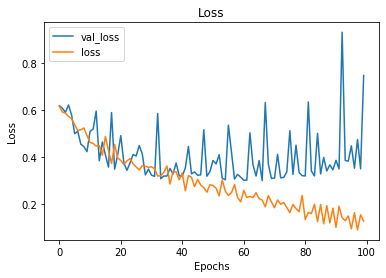

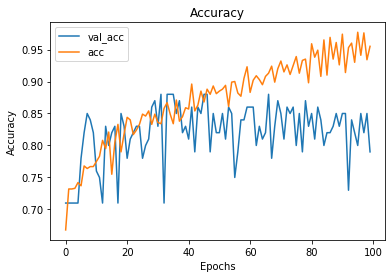

In [16]:
visualize_training_results(history)

## Saving CNN Model

In [17]:
# Your code here; save the model for future reference 
model.save('cnn1_chest_xray_data_augmentation_'+str(date.today())+'.h5')

## Saving history in CSV

In [19]:
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 
# or save to csv: 
hist_csv_file = 'cnn1_chest_xray_data_augmentation'+str(date.today())+'_history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

## Learning rate tuning (hyper-parameter tuning)

In [20]:
# Your code here; design and compile the model
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [22]:
# Set the model to train 
# ⏰ This cell may take several hours to run 
start2 = datetime.datetime.now()
print('program starts, current time:')
print(start2)
history2 = model2.fit(train_images, train_y, epochs=100, batch_size=100, validation_data=(val_images, val_y))
end2 = datetime.datetime.now()
print('program ends, current time:')
print(end2)
elapsed2 = end2 - start2
print('Training took a total of {}'.format(elapsed2))

program starts, current time:
2020-09-17 22:51:41.460493
Epoch 1/100
10/10 [==============================] - 77s 8s/step - loss: 0.6292 - accuracy: 0.6900 - val_loss: 0.6149 - val_accuracy: 0.7100
Epoch 2/100
10/10 [==============================] - 74s 7s/step - loss: 0.5907 - accuracy: 0.7320 - val_loss: 0.6118 - val_accuracy: 0.7100
Epoch 3/100
10/10 [==============================] - 73s 7s/step - loss: 0.5882 - accuracy: 0.7320 - val_loss: 0.6083 - val_accuracy: 0.7100
Epoch 4/100
10/10 [==============================] - 73s 7s/step - loss: 0.5852 - accuracy: 0.7320 - val_loss: 0.6061 - val_accuracy: 0.7100
Epoch 5/100
10/10 [==============================] - 73s 7s/step - loss: 0.5830 - accuracy: 0.7320 - val_loss: 0.6037 - val_accuracy: 0.7100
Epoch 6/100
10/10 [==============================] - 75s 7s/step - loss: 0.5823 - accuracy: 0.7320 - val_loss: 0.6019 - val_accuracy: 0.7100
Epoch 7/100
10/10 [==============================] - 84s 8s/step - loss: 0.5756 - accuracy: 0.732

10/10 [==============================] - 87s 9s/step - loss: 0.3652 - accuracy: 0.8330 - val_loss: 0.3957 - val_accuracy: 0.8100
Epoch 59/100
10/10 [==============================] - 88s 9s/step - loss: 0.3873 - accuracy: 0.8200 - val_loss: 0.3686 - val_accuracy: 0.8400
Epoch 60/100
10/10 [==============================] - 88s 9s/step - loss: 0.3752 - accuracy: 0.8320 - val_loss: 0.3543 - val_accuracy: 0.8500
Epoch 61/100
10/10 [==============================] - 87s 9s/step - loss: 0.3763 - accuracy: 0.8390 - val_loss: 0.3687 - val_accuracy: 0.8300
Epoch 62/100
10/10 [==============================] - 87s 9s/step - loss: 0.3574 - accuracy: 0.8470 - val_loss: 0.4425 - val_accuracy: 0.7700
Epoch 63/100
10/10 [==============================] - 88s 9s/step - loss: 0.3857 - accuracy: 0.8310 - val_loss: 0.5230 - val_accuracy: 0.7400
Epoch 64/100
10/10 [==============================] - 88s 9s/step - loss: 0.3500 - accuracy: 0.8550 - val_loss: 0.4257 - val_accuracy: 0.7700
Epoch 65/100
10/10 

In [23]:
results2_train = model2.evaluate(train_images, train_y)

32/32 [==============================] - 28s 871ms/step - loss: 0.2967 - accuracy: 0.8840


In [24]:
results2_test = model.evaluate(test_images, test_y)

4/4 [==============================] - 2s 438ms/step - loss: 0.7139 - accuracy: 0.7500


In [25]:
results2_train

[0.29667192697525024, 0.8840000033378601]

In [26]:
results2_test

[0.713898777961731, 0.75]

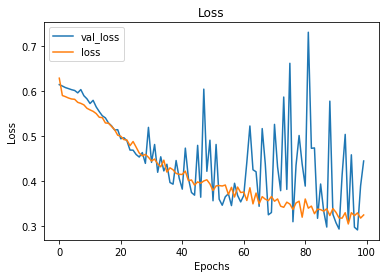

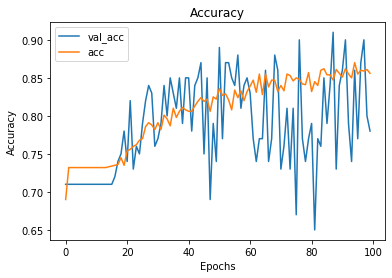

In [27]:
visualize_training_results(history2)

In [28]:
# Your code here; save the model for future reference 
model2.save('cnn1_chest_xray_data_augmentation_LearningRate_Tuning_'+str(date.today())+'.h5')

In [29]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history2.history) 
# or save to csv: 
hist_csv_file = 'cnn1_chest_xray_data_augmentation_LearningRate_Tuning'+str(date.today())+'_history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)